## --The Start--

<H1>The Transportation Problem</H1>
* Consider a set of warehouses each with a given inventory of widgets, and a set of demand centers each with a given demand for widgets. 
* How many widgets should we ship from each warehouse to each demand center such that all demand is satisfied and shipping costs are minimized?

\begin{equation}
\begin{aligned}

& i \in I: \textrm{Warehouses} \\
& j \in J: \textrm{Customers (demand centers)}\\


& u_i: \textrm{capacity for warehouse i (widgets)} \\
& d_j: \textrm{demand at demand center j (widgets)} \\
& c_{ij}: \textrm{shipping cost from warehouse i to customer j (\$/widget)} \\
& x_{ij}: \textrm{the number of widgets to ship from warehouse i to customer j}\\

\\
\\
& \textrm{Linear Programming Formulation}\\
\min_{x} \quad & \sum_{i \in I}\sum_{j \in J} c_{ij} x_{ij} \quad \textrm{(minimize shipping costs)}\\
\textrm{s.t.} \quad & \sum_{i \in I} x_{ij} = d_{j}, \quad j \in J \textrm{(satisfy demand)}\\
                    & \sum_{j \in J} x_{ij} \le u_{i}, \quad i \in I \textrm{(don't exceed capacity)}\\
                    & x_{ij} \ge 0, \quad i \in I, j \in J \quad \textrm{(ship nonnegative quantities)}

\end{aligned}
\end{equation}

In [19]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import gurobipy as gp
from gurobipy import GRB

## Create a new network
- 이 예제에서는 안 쓰는데, 걍 미래를 위해 남겨놓음.

In [20]:
relationship = pd.DataFrame({'from': ['a', 'a', 'b', 'c', 'c', 'c', 'd'],
                            'to': [4, 1, 2, 2, 1, 3, 4] })
display(relationship)

,from,to
0,a,4
1,a,1
2,b,2
3,c,2
4,c,1
5,c,3
6,d,4


## Find the incidence matrix

- oriented=True이면 incidence matrix에서 'from'과 'to'가 -1, +1로 나타남.
- oriented=False이면 incidence matrix에서 연결 상태만 말해줌.

In [21]:
g = nx.from_pandas_edgelist(df=relationship, source='from', target='to', create_using=nx.Graph())
A = nx.incidence_matrix(G=g, oriented=False)

print(A.todense())

[[1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]


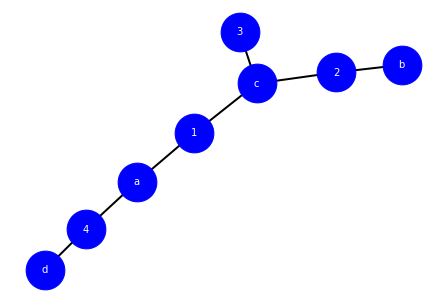

In [22]:
nx.draw(g, with_labels=True, node_color='blue', font_color='white', node_size=1500, font_size=10, width=2)

## Import Data

In [23]:
demands = [15, 18, 14, 20]

In [24]:
capacities = [20, 22, 17, 19, 18]

In [25]:
warehouses = range(len(capacities))

print(f'The number of Loads = {len(demands)}')
print(f'The number of warehouses = {len(capacities)}')

The number of Loads = 4
The number of warehouses = 5


In [26]:
ship_costs =  [[4000, 2500, 1200, 2200],
               [2000, 2600, 1800, 2600],
               [3000, 3400, 2600, 3100],
               [2500, 3000, 4100, 3700],
               [4500, 4000, 3000, 3200]]

ship_costs = np.array(ship_costs)
print(ship_costs)

[[4000 2500 1200 2200]
 [2000 2600 1800 2600]
 [3000 3400 2600 3100]
 [2500 3000 4100 3700]
 [4500 4000 3000 3200]]


In [27]:
m = gp.Model()

## Decision Variables


- should have to decide how many to move between the two points.</br> ----> x variable
- nonnegativity는 addVar( )에서 'lb'로 표현됨.
- 사실, lb=0.0이 default로 되어 있음.

In [28]:
x = { }
customers = range(len(demands))
warehouses = range(len(warehouses))

for warehouse in warehouses:
    for customer in customers:
        
        x[warehouse, customer] = m.addVar(lb=0.0, name='ship.w' + str(warehouse) + '.c' + str(customer))

m.update() # 이걸 사용해야 *Awaiting Model Update* 라고 변수 옆에 안 뜸.

display(x)

{(0, 0): <gurobi.Var ship.w0.c0>,
 (0, 1): <gurobi.Var ship.w0.c1>,
 (0, 2): <gurobi.Var ship.w0.c2>,
 (0, 3): <gurobi.Var ship.w0.c3>,
 (1, 0): <gurobi.Var ship.w1.c0>,
 (1, 1): <gurobi.Var ship.w1.c1>,
 (1, 2): <gurobi.Var ship.w1.c2>,
 (1, 3): <gurobi.Var ship.w1.c3>,
 (2, 0): <gurobi.Var ship.w2.c0>,
 (2, 1): <gurobi.Var ship.w2.c1>,
 (2, 2): <gurobi.Var ship.w2.c2>,
 (2, 3): <gurobi.Var ship.w2.c3>,
 (3, 0): <gurobi.Var ship.w3.c0>,
 (3, 1): <gurobi.Var ship.w3.c1>,
 (3, 2): <gurobi.Var ship.w3.c2>,
 (3, 3): <gurobi.Var ship.w3.c3>,
 (4, 0): <gurobi.Var ship.w4.c0>,
 (4, 1): <gurobi.Var ship.w4.c1>,
 (4, 2): <gurobi.Var ship.w4.c2>,
 (4, 3): <gurobi.Var ship.w4.c3>}

\begin{equation}
\begin{aligned}

& \sum_{i} x_{ij} = d_{j}\\
& \textrm{The lefthand side of the equation can be obtained using the code below. }

\end{aligned}
\end{equation}

In [29]:
gp.quicksum(x[warehouse, 0] for warehouse in warehouses)

<gurobi.LinExpr: ship.w0.c0 + ship.w1.c0 + ship.w2.c0 + ship.w3.c0 + ship.w4.c0>

This fixes customer $c_0$, and sums over the warehouses $w_0,\ldots,w_4$. If this works for customer $c_0$, it should work for the rest of the customers if we add an outer loop.

In [30]:
# customer는 4명이니까 이런 식이 4개가 존재.

for customer in customers:
    print(gp.quicksum(x[warehouse, customer] for warehouse in warehouses) )

ship.w0.c0 + ship.w1.c0 + ship.w2.c0 + ship.w3.c0 + ship.w4.c0
ship.w0.c1 + ship.w1.c1 + ship.w2.c1 + ship.w3.c1 + ship.w4.c1
ship.w0.c2 + ship.w1.c2 + ship.w2.c2 + ship.w3.c2 + ship.w4.c2
ship.w0.c3 + ship.w1.c3 + ship.w2.c3 + ship.w3.c3 + ship.w4.c3


In [31]:
# warehouse는 5명이니까 아래 같은 식이 가능.

for warehouse in warehouses:
    print(gp.quicksum(x[warehouse, customer] for customer in customers) )

ship.w0.c0 + ship.w0.c1 + ship.w0.c2 + ship.w0.c3
ship.w1.c0 + ship.w1.c1 + ship.w1.c2 + ship.w1.c3
ship.w2.c0 + ship.w2.c1 + ship.w2.c2 + ship.w2.c3
ship.w3.c0 + ship.w3.c1 + ship.w3.c2 + ship.w3.c3
ship.w4.c0 + ship.w4.c1 + ship.w4.c2 + ship.w4.c3


## Add Constraints
Generating the correct LinExpr objects for each demand and supply is most of the challenge. We can turn each LinExpr into a constraint by using the overloaded $<=$, $>=$, and $==$ operators.

For the demand constraints, we'll loop over the customers and sum over the warehouses.

Note: We are using Python's list comprehension syntax here, which puts the outer for loop inside the []. It is still the case that the outer loop iterates over the customer, and the inner loop sums over the warehouses.
- nonnegativity는 addVar( )에서 설정해줬음.

In [32]:
# The Demand Constraints

for customer, demand in enumerate(demands): # 여기가 for all j에 해당하는 부분.
    # 아래는 등호 부분.
    m.addConstr(gp.quicksum(x[warehouse, customer] for warehouse in warehouses)  ==  demand, name='demand.' + str(customer) )

We can write a similar method to generate the capacity constraints.
- 부등호가 있어서 objective function처럼 작성할 수는 없음.

In [33]:
# The Capacity Constraints

for warehouse, capacity in enumerate(capacities): # 여기가 for all i에 해당하는 부분.
    # 아래는 부등호 부분.
    m.addConstr(gp.quicksum(x[warehouse, customer] for customer in customers)  <=  capacity, name='capacity.' + str(warehouse))

## Set the objective function
- 한 줄 for loop을 아래처럼 써주면 sigma 표현과 유사해 보여서 보기 편함.

In [34]:
m.setObjective(gp.quicksum(ship_costs[warehouse, customer]*x[warehouse, customer]\
                            for warehouse in warehouses\
                                for customer in customers ))

<H3>Solving the Model</H3>

Now we have the building blocks needed to build and solve a transportation model. Let's put it all together.

In [35]:
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i5-10400F CPU @ 2.90GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 9 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x929325df
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+03, 5e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 2e+01]
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3580000e+05   3.200000e+01   0.000000e+00      0s
       4    1.5390000e+05   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.539000000e+05


In [36]:
if m.status == GRB.Status.OPTIMAL:
    print('Obj Function: ', m.objVal)
    print()
    for v in m.getVars():
        if v.X == 0.0:  # 0이라 필요없는 것들은 출력 안 함.
            continue
        else:
            print(v.varName, np.round(v.X))

else:
    print(m.status)

Obj Function:  153900.0

ship.w0.c2 14.0
ship.w0.c3 6.0
ship.w1.c0 15.0
ship.w1.c3 7.0
ship.w2.c3 7.0
ship.w3.c1 18.0


## --The End--